In [2]:
import pandas as pd
import numpy as np
import plotly.express as px



In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/house_pricing.csv')
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [4]:
df.describe()



,Beds,Baths,SquareFeet,Price
count,814.000000,814.000000,814.000000,814.000000
mean,3.244472,1.960688,1591.146192,239650.063882
std,0.852137,0.669804,663.841930,97549.832306
min,1.000000,1.000000,484.000000,11985.000000
25%,3.000000,2.000000,1144.000000,173096.635000
50%,3.000000,2.000000,1418.500000,215468.525000
75%,4.000000,2.000000,1851.000000,276800.187500
max,8.000000,5.000000,5822.000000,777421.870000


In [5]:
print(df.columns.tolist())

['City', 'Type', 'Beds', 'Baths', 'SquareFeet', 'Price']


In [6]:
df.drop(['City','Type'],axis=1,inplace=True)
df.head()

,Beds,Baths,SquareFeet,Price
0,2,1,836,138159.85
1,3,1,1167,167541.46
2,2,1,796,119095.12
3,2,1,852,130904.95
4,2,1,797,120266.19


In [7]:
df.shape

(814, 4)

<AxesSubplot:title={'center':'Correlation with price'}>

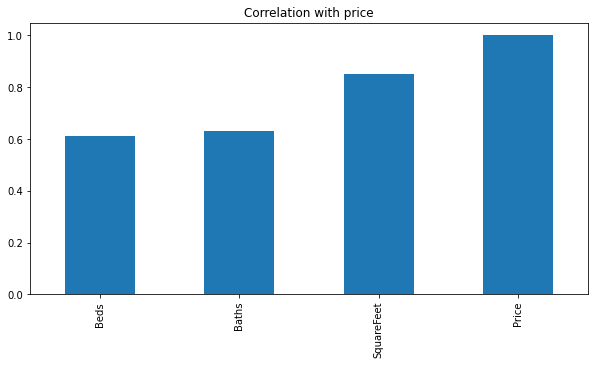

In [8]:
df.corrwith(df['Price']).plot.bar(figsize=(10,5),title='Correlation with price')

In [9]:
X=df[['Beds','Baths','SquareFeet']]
y=df['Price']

In [10]:
import xgboost as xgb

C:\Users\KASHISH JAISWAL\Miniconda3\envs\digi\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [11]:
data_matrix=xgb.DMatrix(X,y)

C:\Users\KASHISH JAISWAL\Miniconda3\envs\digi\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [12]:
params={
    'learning_rate':.01,
    'max_depth':15,
    'alpha':10,

}
results=xgb.cv(
    params,
    data_matrix,
    num_boost_round=500,
    early_stopping_rounds=5,
    metrics='rmse',

)

In [13]:
results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,256239.541667,2333.818894,256206.864583,4700.046025
1,253795.567708,2308.396589,253766.317708,4629.851128
2,251376.614583,2283.129953,251351.083333,4560.583114
3,248982.203125,2258.194566,248960.416667,4491.814223
4,246612.130208,2233.558082,246593.984375,4423.541007
...,...,...,...,...
328,26333.178385,1384.665323,53383.804688,6341.872635
329,26216.968750,1388.191605,53382.799480,6359.459462
330,26103.294922,1392.075341,53380.518229,6369.429753
331,25986.360677,1397.135693,53383.070313,6388.757330


<AxesSubplot:>

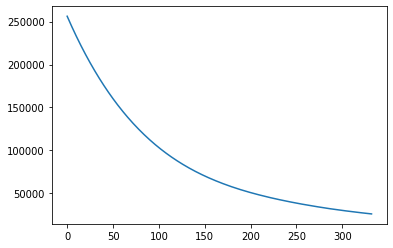

In [14]:
results['train-rmse-mean'].plot()

<AxesSubplot:>

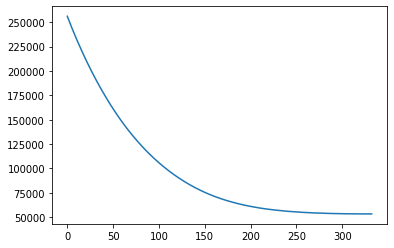

In [15]:
results['test-rmse-mean'].plot()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=1234)

In [18]:
train_matrix=xgb.DMatrix(xtrain,ytrain)
test_matrix=xgb.DMatrix(xtest,ytest)

C:\Users\KASHISH JAISWAL\Miniconda3\envs\digi\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [19]:
model=xgb.train(
    params,
    train_matrix,
    num_boost_round=500,early_stopping_rounds=5,
    evals=[(test_matrix,'test')],


)
model.save_model('house_price_model.xgb')

[0]	test-rmse:246537.42188
[1]	test-rmse:244116.14062
[2]	test-rmse:241719.54688
[3]	test-rmse:239345.20312
[4]	test-rmse:236997.25000
[5]	test-rmse:234671.12500
[6]	test-rmse:232370.90625
[7]	test-rmse:230114.10938
[8]	test-rmse:227882.85938
[9]	test-rmse:225674.37500
[10]	test-rmse:223442.85938
[11]	test-rmse:221276.84375
[12]	test-rmse:219114.73438
[13]	test-rmse:216992.84375
[14]	test-rmse:214874.78125
[15]	test-rmse:212755.06250
[16]	test-rmse:210697.73438
[17]	test-rmse:208643.78125
[18]	test-rmse:206628.53125
[19]	test-rmse:204593.96875
[20]	test-rmse:202603.32812
[21]	test-rmse:200623.57812
[22]	test-rmse:198673.46875
[23]	test-rmse:196754.42188
[24]	test-rmse:194844.31250
[25]	test-rmse:192932.92188
[26]	test-rmse:191072.68750
[27]	test-rmse:189221.39062
[28]	test-rmse:187418.56250
[29]	test-rmse:185584.95312
[30]	test-rmse:183790.75000
[31]	test-rmse:182043.68750
[32]	test-rmse:180288.07812
[33]	test-rmse:178577.21875
[34]	test-rmse:176867.57812
[35]	test-rmse:175146.48438
[3

In [20]:
saved_model = xgb.Booster()
saved_model.load_model('house_price_model.xgb')

In [21]:
X.head(2)

,Beds,Baths,SquareFeet
0,2,1,836
1,3,1,1167


In [22]:
saved_model.predict(xgb.DMatrix(X.head(2)))

C:\Users\KASHISH JAISWAL\Miniconda3\envs\digi\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([127493.125, 168191.   ], dtype=float32)

In [23]:
y[:2]

0    138159.85
1    167541.46
Name: Price, dtype: float64

In [24]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

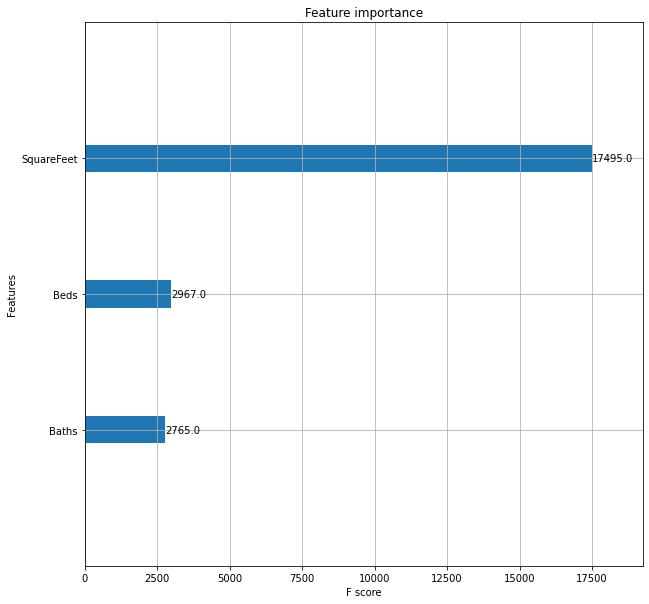

In [25]:
f,a=plt.subplots(figsize=(10,10))
xgb.plot_importance(model,ax=a)

In [26]:
df['pred']=saved_model.predict(xgb.DMatrix(X))
df.head()

,Beds,Baths,SquareFeet,Price,pred
0,2,1,836,138159.85,127493.125000
1,3,1,1167,167541.46,168191.000000
2,2,1,796,119095.12,130905.984375
3,2,1,852,130904.95,129778.421875
4,2,1,797,120266.19,120824.945312


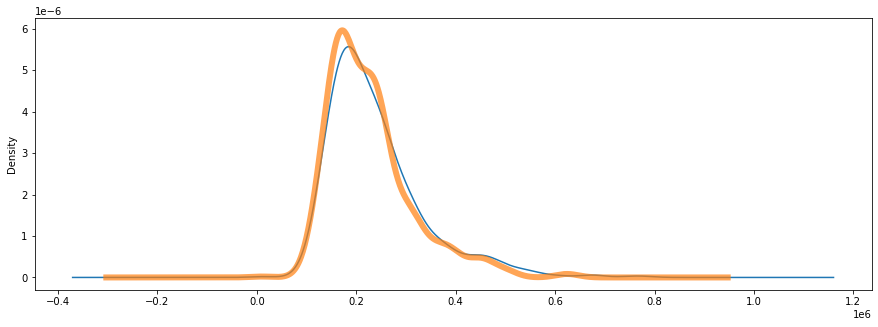

In [27]:
ax = df['Price'].plot.kde(label='Actual',figsize=(15,5))
df['pred'].plot.kde(ax=ax,linewidth=6,label='Predicted',alpha=.7)
plt.show()